# Viability

Andreas Svendsen

# Viability

## Setup

In [ ]:

library(data.table)
library(ggplot2)
library(patchwork)
library(here)


here() starts at C:/Users/alosvendsen/Documents/R/manuscript_one

## Load and wrangle data

In [ ]:
data <- readRDS(here("notebooks/viability/data_processed/final_viability.rds"))

# Convert 'day' to a factor
data[, day := as.factor(day)]

# Calculate the mean ATP for each donor on day 5
mean_day5 <- data[day == 5, .(mean_ATP_day5 = mean(ATP)), by = .(donor)]

# Merge this back with the main data
data <- merge(data, mean_day5, by = "donor")

# Calculate the relative ATP
data[, relative_ATP := ATP / mean_ATP_day5]

# Calculate the mean relative ATP for each donor and day
mean_data <- data[, .(mean_relative_ATP = mean(relative_ATP)), by = .(day, donor)]

# Calculate the overall mean across all donors for each day
overall_mean <- mean_data[, .(overall_mean_ATP = mean(mean_relative_ATP)), by = day]


## Plotting

#### Overall relative viability

In [ ]:
# Plotting
plot_relative_viability <- 
ggplot() +
  geom_point(data = mean_data,
             mapping = aes(x = day, y = mean_relative_ATP, color = as.factor(donor))) +
  geom_point(data = overall_mean,
             mapping = aes(x = day, y = overall_mean_ATP),
             size = 5,
             alpha = 0.5) +
  labs(title = "Mean ATP Relative to Day 5 Across Donors",
       x = "Day",
       y = "Mean Relative ATP") +
  scale_y_continuous(
    name = "Relative viability",
    limits = c(0, NA)
  )


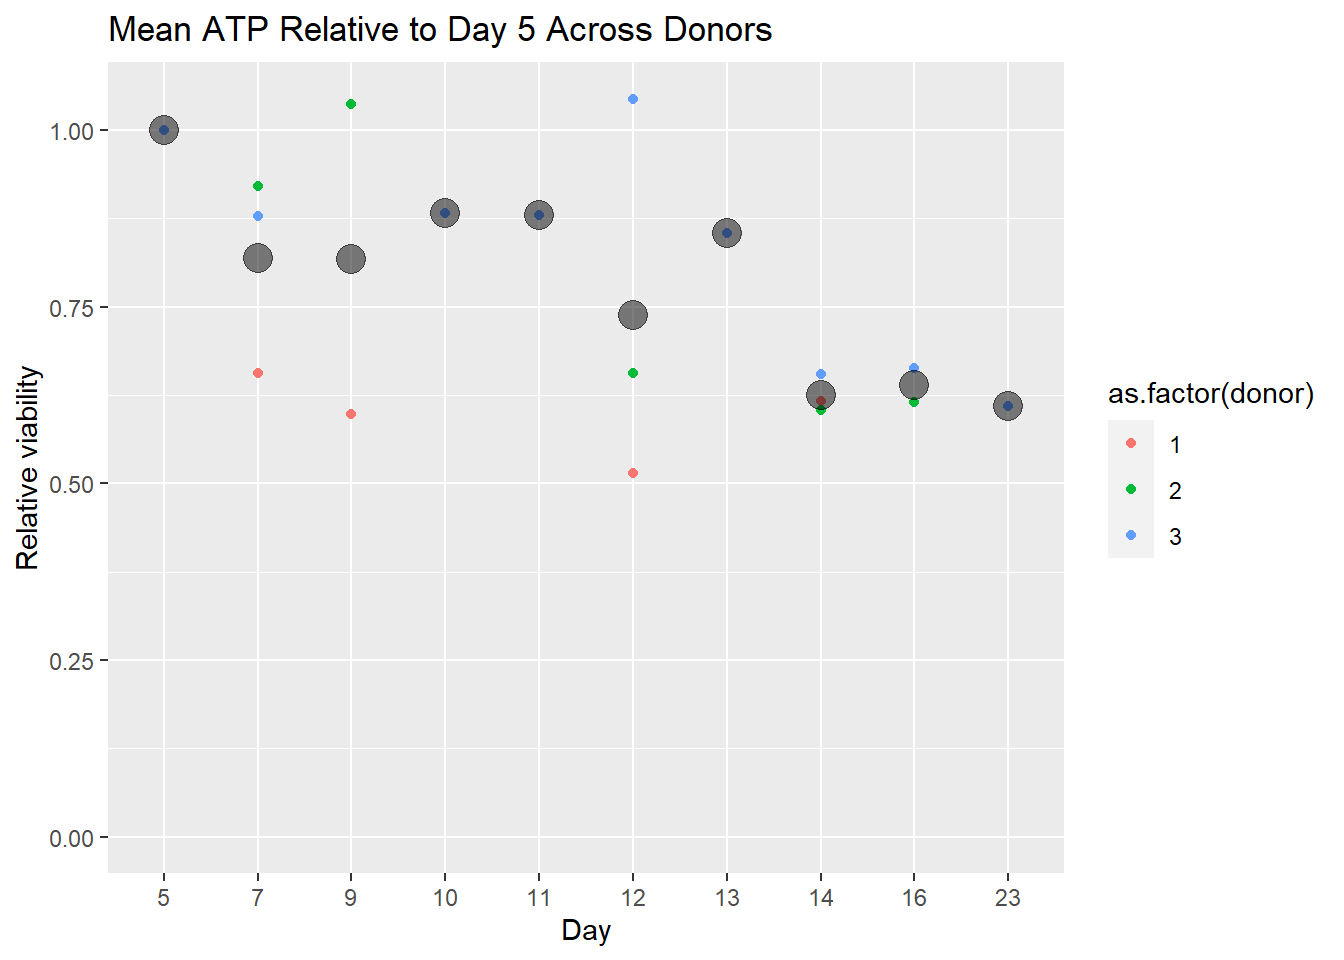

In [ ]:
plot_relative_viability


#### Overall absolute viability

In [ ]:
data <- readRDS(here("notebooks/viability/data_processed/final_viability.rds"))

mean_ATP <- data[, mean(ATP, na.rm = TRUE), by = .(day, donor)]

plot_absolute_viability <- 
ggplot() +
  geom_point(
    data = mean_ATP,
    mapping = aes(
      x = day,
      y = V1,
      color = as.factor(donor)
    )
  ) +
  labs(title = "Absolute ATP content",
       x = "Day",
       y = "ATP content (pmol/spheroid") +
  scale_y_continuous(limits = c(0, NA))


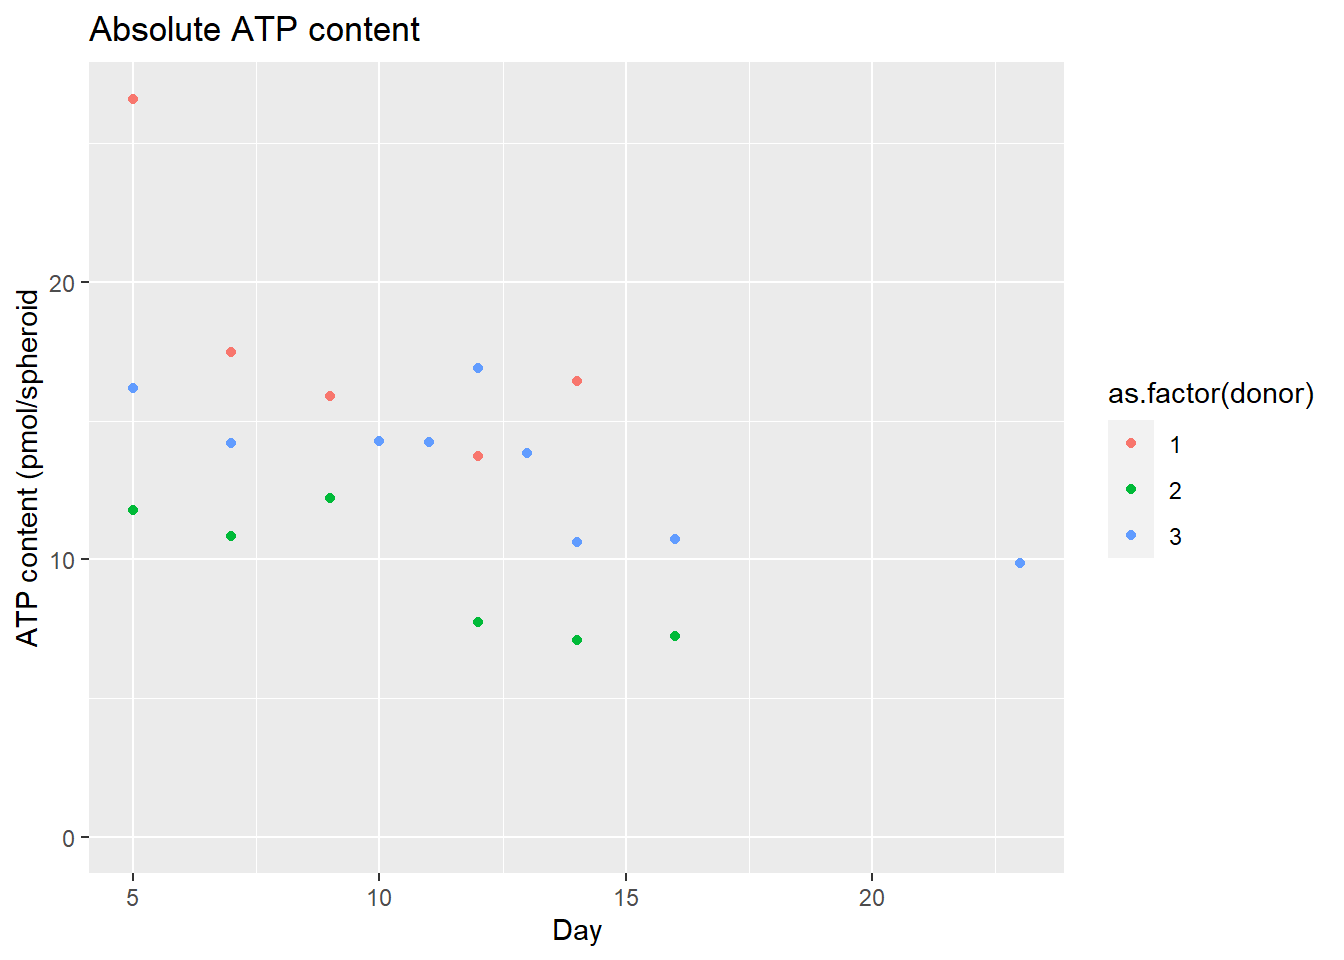

In [ ]:
#|
plot_absolute_viability


### Plot individual donors

In [ ]:
# Load data ---------------------------------------------------------------
data <- readRDS(here("notebooks/viability/data_processed/final_viability.rds"))


#### Donor 1 ####
donor_1 <- data[donor == 1]

donor_1[, mean_ATP := mean(ATP), by = .(day)]

calibrator <- donor_1[day == 5, mean_ATP][1]

donor_1[, relative_ATP := ATP / calibrator]

plot_donor_1 <- 
ggplot(
  data = donor_1,
  aes(
    x=as.factor(day),
    y = relative_ATP
    )
  ) +
  geom_point() +
  stat_summary(fun = mean, color = "red") +
  scale_y_continuous(name = "ATP content relative to day 5", limits = c(0, 1.5))


#### Donor 2 ####
donor_2 <- data[donor == 2]

donor_2[, mean_ATP := mean(ATP), by = .(day)]

calibrator <- donor_2[day == 5, mean_ATP][1]

donor_2[, relative_ATP := ATP / calibrator]

plot_donor_2 <- 
ggplot(
  data = donor_2,
  aes(
    x=as.factor(day),
    y = relative_ATP
  )
) +
  geom_point() +
  stat_summary(fun = mean, color = "red") +
  scale_y_continuous(limits = c(0, 1.5))


#### Donor 3 ####
donor_3 <- data[donor == 3]

donor_3[, mean_ATP := mean(ATP), by = .(day)]

calibrator <- donor_3[day == 5, mean_ATP][1]

donor_3[, relative_ATP := ATP / calibrator]

plot_donor_3 <- 
ggplot(
  data = donor_3,
  aes(
    x=as.factor(day),
    y = relative_ATP
  )
) +
  geom_point() +
  stat_summary(fun = mean, color = "red")+
  scale_y_continuous(limits = c(0, 1.5))


plot_donor_relative_viability <- 
  wrap_plots(list(plot_donor_1, plot_donor_2, plot_donor_3)) +
  plot_annotation(title = "Individual donor viability relative to day 5")

# ggsave(plot = donor_relative_viability,
#        filename = here("notebooks/viability/output/donor_relative_viability.png"))


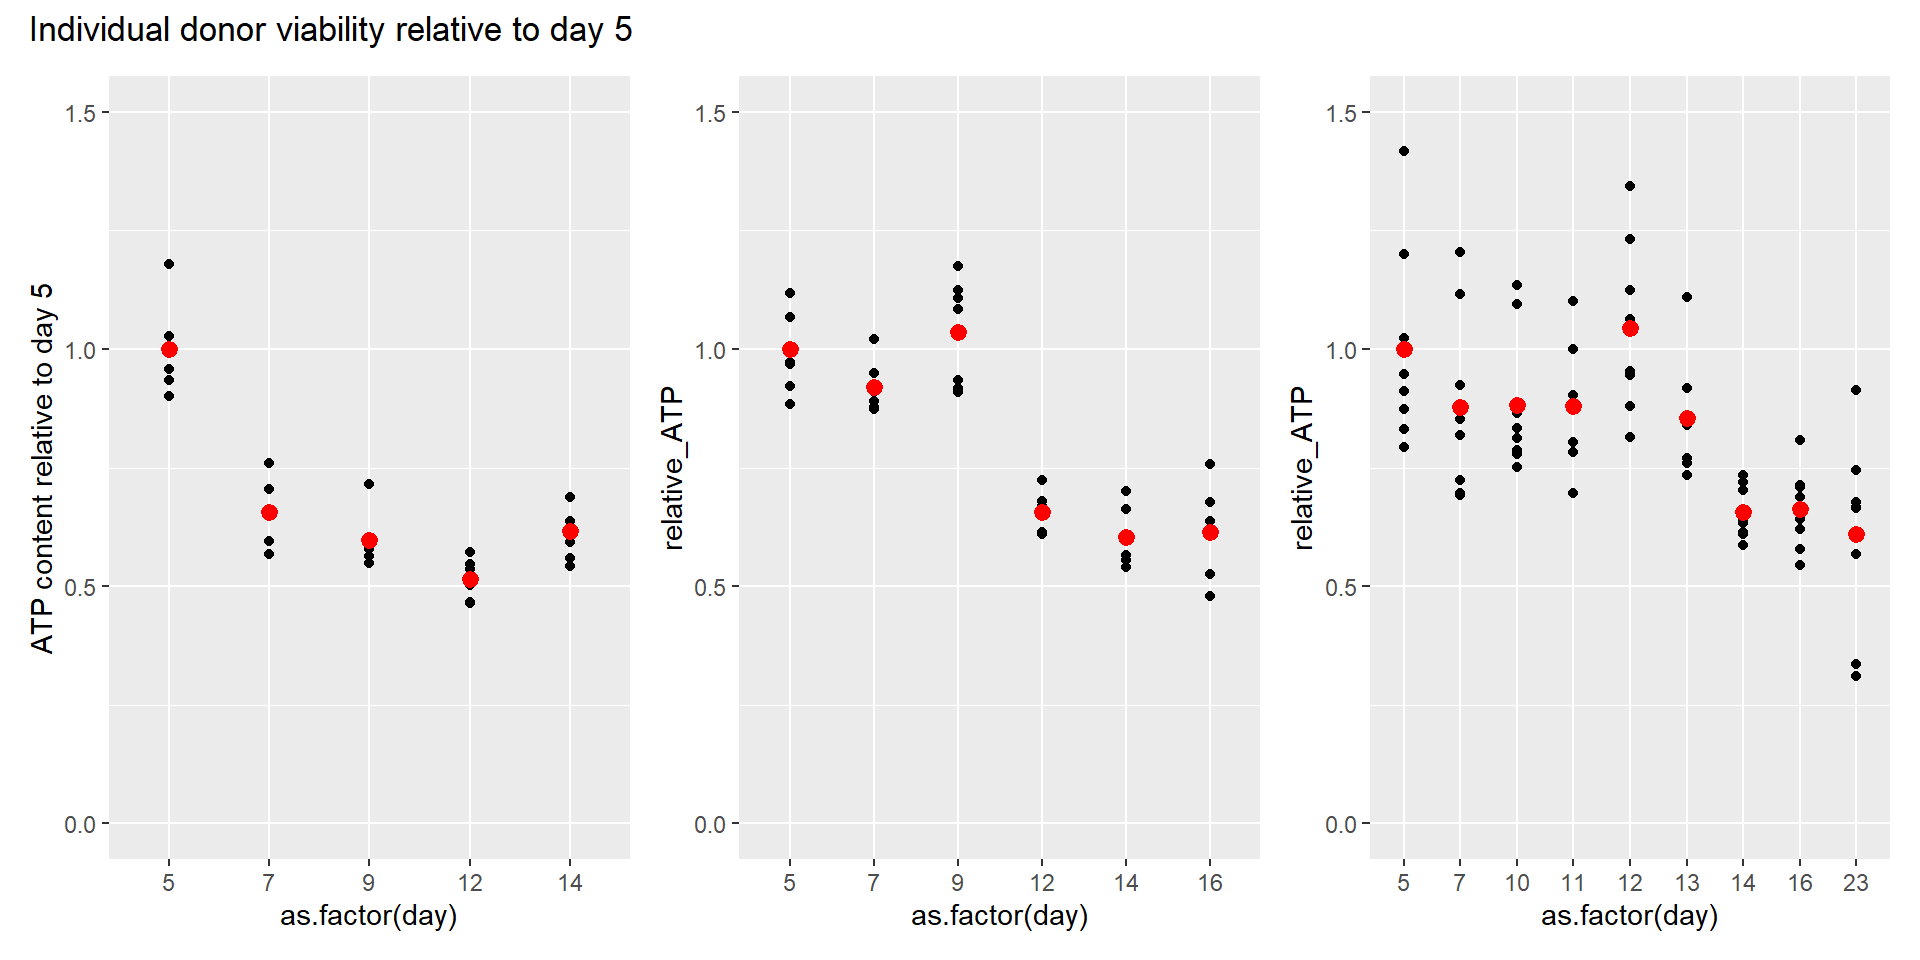

In [ ]:

plot_donor_relative_viability


In [ ]:
rmv <- ls()[-grep("plot", ls())]
rm(list = rmv, rmv)
